## 读取Excel生成PDF报告

### 1. 引入相关包

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

# 安装方法：pip install reportlab
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.styles import getSampleStyleSheet,ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer,Image,Table,TableStyle
from reportlab.lib import colors
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch

### 设置中文字体名称为微软雅黑，msyh.ttf需要自己指定文件路径
pdfmetrics.registerFont(TTFont('msyh', 'msyh.ttf'))

### 2. 数据统计

In [2]:
df = pd.read_excel("./数据-学生成绩表.xlsx", index_col='姓名')
df.head(3)

语文  数学  英语
姓名            
张伟  94  79  63
王伟  79  91  77
王芳  99  69  46

In [3]:
# 描述性统计
df_desc = (
    df
    .describe()
    .applymap(lambda x : round(x, 2))
    .reset_index()
    .rename(columns={'index':'统计项'})
)
df_desc

统计项     语文      数学      英语
0  count  50.00   50.00   50.00
1   mean  71.80   66.96   69.68
2    std  17.23   15.49   18.13
3    min  40.00   41.00   41.00
4    25%  59.50   54.25   53.25
5    50%  73.00   67.50   70.50
6    75%  86.00   76.00   82.50
7    max  99.00  100.00  100.00

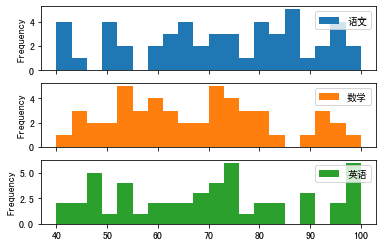

In [4]:
# 输出统计图
df.plot.hist(bins=20, subplots=True)
plt.savefig('plot.png')

### 3. 开始构建PDF，添加标题文字

In [5]:
# 容纳所有的PDF的内容
elements = []

# 读取reportlab定义好的样式表
style = getSampleStyleSheet()

In [6]:
# 大标题
title = """ <para> <font face="msyh"> 考生成绩统计报告 </font> </para>"""
elements.append(Paragraph(title, style['Heading1']))

### 4. 添加表格

In [7]:
# 转换成数组
table_data  = [list(df_desc.columns)] + df_desc.to_numpy().tolist()
table_data

[['统计项', '语文', '数学', '英语'],
 ['count', 50.0, 50.0, 50.0],
 ['mean', 71.8, 66.96, 69.68],
 ['std', 17.23, 15.49, 18.13],
 ['min', 40.0, 41.0, 41.0],
 ['25%', 59.5, 54.25, 53.25],
 ['50%', 73.0, 67.5, 70.5],
 ['75%', 86.0, 76.0, 82.5],
 ['max', 99.0, 100.0, 100.0]]

In [8]:
# 小标题
title = """ <para> <font face="msyh"> 统计明细 </font> </para>"""
elements.append(Paragraph(title, style['Heading2']))

# 表格对象
mytable = Table(table_data)
mytab_style = TableStyle([
    ('GRID', (0,0), (-1,-1), 1, colors.black),
    ('FONTSIZE', (0,0), (-1,-1), 12),
    ('ALIGN', (0,-1), (-1,-1), 'LEFT'),
    ('FONT', (0,0), (-1,-1), 'msyh')
])
mytable.setStyle(mytab_style)

# 添加对象
elements.append(mytable)
elements.append(Spacer(1, 0.2*inch))

### 5. 添加图片

In [9]:
# 添加一个小标题
elements.append(
    Paragraph("""<para><font face="msyh">成绩分布</font></para>""", 
              style["Heading2"]))

# 添加图片
img = Image('plot.png')
elements.append(img)
elements.append(Spacer(1, 0.2*inch))

### 6. 生成PDF文件

In [10]:
doc = SimpleDocTemplate("学生成绩统计报告.pdf", pagesize=(A4[0], A4[1]))

In [11]:
doc.build(elements)